In [59]:
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
data = pd.read_csv('data_imdb_adventure.csv', dtype = {'release_date': str})
print(data.dtypes)
data.head()

movie_name             object
description            object
release_date           object
director               object
rating                float64
duration              float64
genre                  object
actors                 object
start_filming_date     object
end_filming_date       object
votes                 float64
dtype: object


,movie_name,description,release_date,director,rating,duration,genre,actors,start_filming_date,end_filming_date,votes
0,The Adam Project,"""After accidentally crash-landing in 2022, tim...",2022,Shawn Levy,6.8,106.0,"Action, Adventure, Comedy","Ryan Reynolds, Walker Scobell, Mark Ruffalo, J...",18 November 2020,8 March 2021,74592.0
1,Rot,A 13-year-old girl named Meilin turns into a g...,2022,Domee Shi,7.1,100.0,"Animation, Adventure, Comedy","Rosalie Chiang, Sandra Oh, Ava Morse, Hyein Park",NaN,NaN,39574.0
2,Spider-Man: No Way Home,"With Spider-Man's identity now revealed, Peter...",2021,Jon Watts,8.6,148.0,"Action, Adventure, Fantasy","Tom Holland, Zendaya, Benedict Cumberbatch, Ja...",6 November 2020,26 March 2021,533570.0
3,The King's Man,"In the early years of the 20th century, the Ki...",2021,Matthew Vaughn,6.3,131.0,"Action, Adventure, Thriller","Ralph Fiennes, Gemma Arterton, Rhys Ifans, Har...",22 January 2019,NaN,97399.0
4,Uncharted,Street-smart Nathan Drake is recruited by seas...,2022,Ruben Fleischer,6.7,116.0,"Action, Adventure","Tom Holland, Mark Wahlberg, Antonio Banderas, ...",NaN,NaN,53748.0


In [69]:
data[['release_date', 'start_filming_date', 'end_filming_date']] = data[['release_date', 'start_filming_date', 'end_filming_date']].apply(pd.to_datetime)
data.head()

,movie_name,description,release_date,director,rating,duration,genre,actors,start_filming_date,end_filming_date,votes
0,The Adam Project,"""After accidentally crash-landing in 2022, tim...",2022-01-01,Shawn Levy,6.8,106.0,"Action, Adventure, Comedy","Ryan Reynolds, Walker Scobell, Mark Ruffalo, J...",2020-11-18,2021-03-08,74592.0
1,Rot,A 13-year-old girl named Meilin turns into a g...,2022-01-01,Domee Shi,7.1,100.0,"Animation, Adventure, Comedy","Rosalie Chiang, Sandra Oh, Ava Morse, Hyein Park",NaT,NaT,39574.0
2,Spider-Man: No Way Home,"With Spider-Man's identity now revealed, Peter...",2021-01-01,Jon Watts,8.6,148.0,"Action, Adventure, Fantasy","Tom Holland, Zendaya, Benedict Cumberbatch, Ja...",2020-11-06,2021-03-26,533570.0
3,The King's Man,"In the early years of the 20th century, the Ki...",2021-01-01,Matthew Vaughn,6.3,131.0,"Action, Adventure, Thriller","Ralph Fiennes, Gemma Arterton, Rhys Ifans, Har...",2019-01-22,NaT,97399.0
4,Uncharted,Street-smart Nathan Drake is recruited by seas...,2022-01-01,Ruben Fleischer,6.7,116.0,"Action, Adventure","Tom Holland, Mark Wahlberg, Antonio Banderas, ...",NaT,NaT,53748.0


### Visualizations

0    2022-01-01
1    2022-01-01
2    2021-01-01
3    2021-01-01
4    2022-01-01
        ...    
95   2014-01-01
96   1987-01-01
97   1985-01-01
98   1999-01-01
99   2005-01-01
Name: release_date, Length: 100, dtype: datetime64[ns]

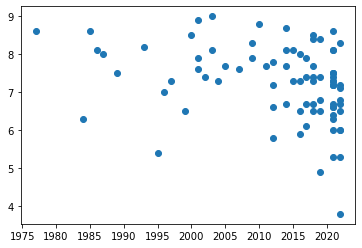

In [70]:
# rating per year of release

plt.scatter( data['release_date'], data['rating'] )

In [63]:
# Number of movies / actor
# All the movies have each 4 actors reported.
print( data['actors'].str.split(',').apply(len).value_counts() )


4    100
Name: actors, dtype: int64


In [64]:
# Number of movies / director

# director
# There are 9 movies with 2 directors, 2 with 3 directors and 1 with 4 directors. Rest of the movies have only one director
data['director'].str.split(',').apply(len).value_counts()

# data['director'][data['director'].str.split(',').apply(len) > 1]

1    88
2     9
3     2
4     1
Name: director, dtype: int64